# Classifying Topics of Newswires

In [7]:
# imports
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### Generating & Process Data

In [3]:
# data
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# define data utility functions
word_index = reuters.get_word_index()
index_word = {index: word for (word, index) in word_index.items()}
decode_newswire = lambda wire: " ".join([index_word[i] for i in wire])

def vectorize_sequences(wires, words=num_words):
    results = np.zeros((len(wires), words))
    for i, wire in enumerate(wires):
        for j in wire:
            results[i, j] = 1
    return results

In [35]:
# features turn into one-hot-encoding of presence of words
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

### Define Model

In [66]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [67]:
num_val = 1000
x_val = x_train[:num_val]
y_val = y_train[:num_val]
partial_x_train = x_train[num_val:]
partial_y_train = y_train[num_val:]

### Train & Evaluate Model

In [68]:
# train model
history = model.fit(partial_x_train, partial_y_train,
                    batch_size=512, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.0423 - accuracy: 0.5714 - val_loss: 1.2444 - val_accuracy: 0.7300
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 0.9469 - accuracy: 0.7938 - val_loss: 1.0415 - val_accuracy: 0.7780

In [69]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

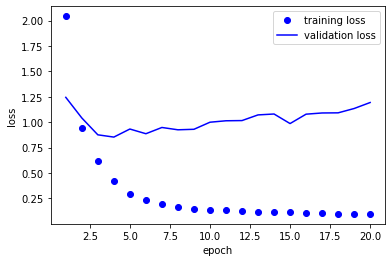

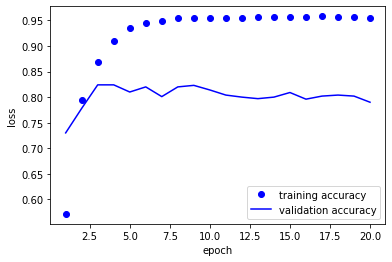

Minimum Validation Loss: 0.8533570766448975


In [70]:
# graph model
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = np.array(range(1, len(train_loss) + 1))
plt.plot(epochs, train_loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.clf()
plt.plot(epochs, train_acc, "bo", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

print(f"Minimum Validation Loss: {min(val_loss)}")

In [71]:
# evaluate model
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.3617 - accuracy: 0.7805


[1.3617125749588013, 0.7804986834526062]

### Predicting using the model

In [72]:
predictions = model.predict(x_test)

